In [1]:
import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#chargement des données
dfAlphaDigits = sio.loadmat("binaryalphadigs.mat")

In [4]:
#lire_alpha_digit
def lire_alpha_digit(dataset, listId):
    subsetData = dataset[listId,:].flatten()
    listImages = np.array([])

    for data in subsetData:
        listImages = np.append(listImages,data.flatten())
    
  
    output = np.array(listImages)

    return output

def lire_alpha_digit(dataset, list_idx):
  imgs_set = dataset[list_idx,:].flatten()
  imgs_flatten = []

  for img in imgs_set:
    imgs_flatten.append(img.flatten())
  
  imgs_set_output = np.array(imgs_flatten)

  return imgs_set_output

In [5]:
class RBMobject:
  def __init__(self, p, q):
    self.W = 0.01 * np.random.rand(p,q)
    self.a = np.zeros((1,p))
    self.b = np.zeros((1,q))
    
def init_RBM(p,q):
    rbm = RBMobject(p,q)
    rbm.W = 0.01 * np.random.rand(p,q)
    return rbm

In [6]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def entree_sortie_RBM(RBM, data):
    b = RBM.b.reshape(-1,1)
    W = RBM.W
    #n, p = data.shape

    sortie_RBM = 1/(1 + np.exp(- b.T - np.dot(data, W)))

    return sortie_RBM

In [7]:
  
def sortie_entree_RBM(RBM, output_values):
    W = RBM.W
    a = RBM.a.reshape(-1,1)
    #n, p = output_values.shape
    
    entree_RBM = 1/(1 + np.exp(- a.T - np.dot(output_values, W.T)))
    return entree_RBM
    

In [8]:
def train_RBM(RBM, nb_epochs, learning_rate, batch_size, data, q):
    MSE = []
    n = data.shape[0]
    p = data.shape[1]
    for i in range(0, nb_epochs):
        #shuffle
        np.random.shuffle(data)
        #batch iteration
        for batch in range(0, n, batch_size):
            indexX = np.arange(batch, min(batch + batch_size, n))
            data_batch = data[indexX, :]
            taille_batch = data_batch.shape[0]
            v_0 = data_batch
            p_h_v_0 = entree_sortie_RBM(RBM, v_0)
            #tirage suivant la loi
            h_0 = (np.random.rand(taille_batch, q) < p_h_v_0).astype(int)
            p_v_h_0 = sortie_entree_RBM(RBM, h_0)
            #tirage suivant la loi
            v_1 = (np.random.rand(taille_batch, p) < p_v_h_0).astype(int)
            p_h_v_1 = entree_sortie_RBM(RBM, v_1)
            
            #Gradient descent
            da = np.sum(v_0-v_1, axis = 0)/taille_batch
            db = np.sum(p_h_v_0 - p_h_v_1, axis=0)/taille_batch
            dW = (v_0.T @ p_h_v_0 - v_1.T @ p_h_v_1) / taille_batch
            
            RBM.a = RBM.a + learning_rate * da
            RBM.b = RBM.b + learning_rate * db
            RBM.W = RBM.W + learning_rate * dW
            
        #reconstruction de l'entrée
        h = entree_sortie_RBM(RBM, data)
        data_reconstr = sortie_entree_RBM(RBM, h)
        MSE.append(np.sum((data_reconstr - data)**2)/(n*p))
    return RBM, MSE

In [9]:
def generer_image_RBM(RBM, n_img, n_iter):

  p,q = RBM.W.shape


  for i in range(0, n_img):
    v = (np.random.rand(p) < 0.5).astype("int")
    for j in range(0,n_iter):
        p_h = entree_sortie_RBM(RBM, v)
        h = (np.random.rand(q)<p_h).astype('int')
        p_v = sortie_entree_RBM(RBM, h)
        v = (np.random.rand(p) < p_v).astype('int')

    plt.subplot(int(n_img/5), 5, i+1)
    plt.imshow(1-v.reshape(20,16), cmap='gray')
    plt.show()

  return v

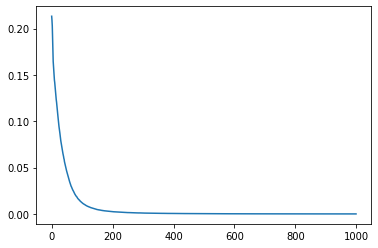

In [24]:


index = [17, 19]
data = lire_alpha_digit(dfAlphaDigits['dat'], index)
p = data.shape[1]
q = 200
nb_epochs = 1000
learning_rate = 0.1
batch_size = 10
rbm = RBMobject(p,q)
RBM, MSE = train_RBM(rbm, nb_epochs, learning_rate, batch_size, data, q)

plt.plot(MSE)
plt.show()

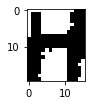

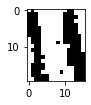

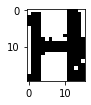

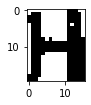

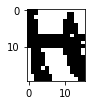

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 

In [11]:
generer_image_RBM(RBM, 5, 1000)

In [12]:
def init_DBN(nb_couches, couches):
    DBN = []
    for i in range(0, nb_couches):
        p = couches[i][0]
        q = couches[i][1]
        DBN.append(init_RBM(p,q))
    return DBN

In [13]:
def pretrainDBN(DBN, nb_iter, learning_rate, mini_batch_size, data):
    trainDBN = []
    nb_couches = len(DBN)
    for i in range(0, nb_couches):
        q = DBN[i].W.shape[1]
        train_RBMi, MSE = train_RBM(DBN[i], nb_iter, learning_rate, mini_batch_size, data, q)
        trainDBN.append(train_RBMi)
        data = entree_sortie_RBM(DBN[i], data)
    return trainDBN

In [14]:
def generer_img_DBN(preDBN, nb_iter_gibbs, nb_images, size):
    for i in range(0,nb_images):
        print(preDBN[-1])
        p = preDBN[-1].W.shape[0]
        generation = np.random.rand(1, p)
        outputImage = (generation < 0.5)
        
        for iteration in range(nb_iter_gibbs):
            probability = entree_sortie_RBM(preDBN[-1], outputImage)
            generation = np.random.rand(probability.shape[0], probability.shape[1])
            sortie = (generation < probability)
            probability = sortie_entree_RBM(preDBN[-1], sortie)
            generation = np.random.rand(probability.shape[0], probability.shape[1])
            outputImage = (generation < probability)
        
        for l in range(len(preDBN)-2, -1, -1):
            probability = sortie_entree_RBM(preDBN[l], outputImage)
            generation = np.random.rand(probability.shape[0], probability.shape[1])
            outputImage = (generation < probability)
        # afficher image 
        image_sortie = np.reshape(outputImage, size)
        plt.figure()
        plt.imshow(image_sortie)

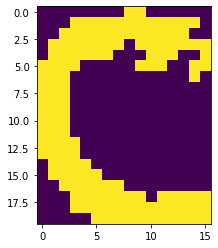

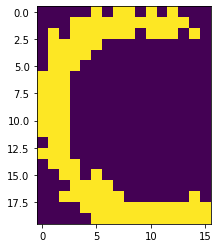

In [15]:
index = [12]
data = lire_alpha_digit(dfAlphaDigits['dat'], index)
p = data.shape[1]
q = 200
nb_epochs = 1000
learning_rate = 0.1
mini_batch_size = 10
nb_iter_gibbs = 100
nb_images = 2

image_x = 20
image_y = 16
shape = (image_x, image_y)
        
neurones = [(p, 50),(50, 20),(20, 10)]
nb_couches = len(neurones)

DBN = init_DBN(nb_couches, neurones)

trainDBN = pretrainDBN(DBN, nb_epochs, learning_rate, mini_batch_size, data)
generer_img_DBN(trainDBN, nb_iter_gibbs, nb_images, shape)

plt.show()

In [16]:
def calcul_softmax(rbm, data):
    num = np.exp(np.dot(data, rbm.W) + rbm.b)
    den = num.sum(1)
    denominator = np.zeros(num.shape)
    for i in range(num.shape[1]):
        denominator[:, i] = den
    return num/denominator    

In [17]:
def entree_sortie_reseau(dnn, data):
    output_couches_cachees = []
    output_couches_cachees.append(entree_sortie_RBM(dnn[0], data))
    for i in range(1, len(dnn) - 1):
        output_couches_cachees.append(entree_sortie_RBM(dnn[i], output_couches_cachees[i-1]))
    output_couches_cachees.append(calcul_softmax(dnn[len(dnn)-1], output_couches_cachees[-1]))
    return output_couches_cachees

In [18]:
def retropropagation(dnn, n_iter, learning_rate, mini_batch_size, data, label):
    entropy=[]
    for iteration in range(0, n_iter):
        np.random.shuffle(data)
        for batch in range(0, data, batch_size):
            newDNN = dnn
            indexX = np.arange(batch, min(batch + mini_batch_size, n))
            data_batch = data[indexX, :]
            taille_batch = data_batch.shape[0]
            output_couches = entree_sortie_reseau(dnn, data_batch)
            
            diff_output_true_label = output_couches[-1] - label[indexX]
            grad_W = np.dot(output_couches[len(dnn)-2].T, diff_output_true_label)
            grad_b = diff_output_true_label.sum(0)
            newDNN[-1].W = newDNN[len(dnn) - 1].W - learning_rate * grad_W / taille_batch
            newDNN[-1].b = newDNN[len(dnn) - 1].b - learning_rate * grad_b / taille_batch
            
            for layer in range(len(dnn)-2, -1, -1):
                
                if layer == 0:
                    entree = data
                else:
                    entree = output_couches[layer-1]
                diff_output_true_label = np.dot(diff_output_true_label, dnn[layer+1].W.T)*output_couches[layer]*(1-output_couches[layer])                
                
                grad_W = np.dot(entree.T, diff_output_true_label)
                grad_b = diff_output_true_label.sum(0)
                newDNN[couche].w = newDNN[couche].W - learning_rate*grad_W/taille_bacth
                newDNN[couche].b = newDNN[couche].b - learning_rate*grad_b/taille_batch
            
            dnn = newDNN
        output_couches = entree_sortie_reseau(dnn, data)
        errorClassif = -np.log10(output_couches[-1])[label==1]
        erreur = errorClassif.sum()
        entropy.append(erreur)
    f = plt.figure(figsize=(10, 7))
    plt.plot(range(n_iter), entropy)
    plt.legend(['Entropie croisée'])
    plt.title("Évolution de l'entropie croisée au cours des iterations")
    plt.xlabel("nombre d'itérations")
    plt.ylabel('entropie croisée')
    f.savefig('retropropagation_{}.png'.format(pre_trained))
    return dnn       
       
    

In [19]:
def test_DNN(dnn, data, label):
    y_pred = entree_sortie_reseau(dnn, data)[-1]
    return sum(y_pred-label)/len(label)
    

In [32]:
image_x = 20
image_y = 16
shape = (image_x, image_y)
        
neurones = [(p, 50),(50, 20),(20, 10)]
nb_couches = len(neurones)

m = 10
X_train = data[10*39:(10+m)*39]
print(X_train)
Y_train = np.zeros((39*m, 10))
for i in range(10):
    Y_train[39*i:39*(i+1),i] = 1

nb_iter = 150
lr = 0.05
batch_size = 10
indices_train = []
indices_test = []

for i in range(10):
    indices_train += range(39*i,39*(i+1)-10,1)
    indices_test += range(39*(i+1)-10, 39*(i+1),1)
print(indices_train)
    
print(len(X_train))
data_x_train = X_train[indices_train]
data_y_train = Y_train[indices_train, :]
data_x_test = X_train[indices_test]
data_y_test = Y_train[indices_test, :]
        
dbn = init_DBN(nb_couches, neurones)
dnn = retropropagation(dbn, data_x_train, data_y_train, nb_iter, lr, batch_size, "normal")
test_DNN(dnn, data_x_test, data_y_test)

michel = init_DBN(nb_couches, neurones)
michelle = train_DBN(data_x_train, michel, batch_size, nb_iter, lr, neurones)
claude = retropropagation(michelle, data_x_train, data_y_train, nb_iter, lr, batch_size, "pre_trained")
test_DNN(claude, data_x_test, data_y_test)

[]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 2

IndexError: index 0 is out of bounds for axis 0 with size 0